In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_excel('C:/Users/a5fwpzz/Desktop/Train.xlsx')

In [3]:
test=pd.read_excel('C:/Users/a5fwpzz/Desktop/Test.xlsx')

In [4]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [5]:
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [8]:
train.shape,test.shape

((5961, 7), (1987, 6))

In [9]:
# we need to merge data first

df=pd.concat([train,test],sort=False)
print(train.shape,test.shape,df.shape)

(5961, 7) (1987, 6) (7948, 7)


In [10]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0


In [11]:
df.shape

(7948, 7)

In [12]:
#to select categorical features
categorical_features=df.select_dtypes(include=[np.object])
categorical_features.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam"
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore"
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on..."
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai"


In [13]:
#to select numerical features

numerical_features=df.select_dtypes(include=[np.number])
numerical_features.head()

,Fees
0,100.0
1,350.0
2,300.0
3,250.0
4,250.0


In [14]:
# dropping miscellaneous info column as an overview it has all same features from other columns and won't affect prediction

In [18]:
df.drop(['Miscellaneous_Info'],axis=1,inplace=True)

In [20]:
df.isnull().sum()

Qualification       0
Experience          0
Rating           4392
Place              31
Profile             0
Fees             1987
dtype: int64

<AxesSubplot:>

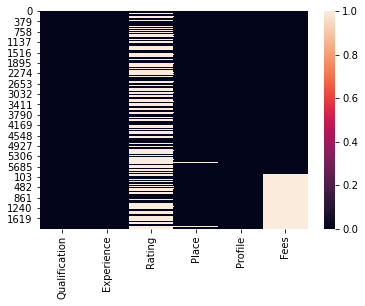

In [21]:
sn.heatmap(df.isnull())

In [22]:
# to correct nan,infinity values

df=df[~df.isin([np.nan,np.inf,-np.inf]).any(1)]

<AxesSubplot:>

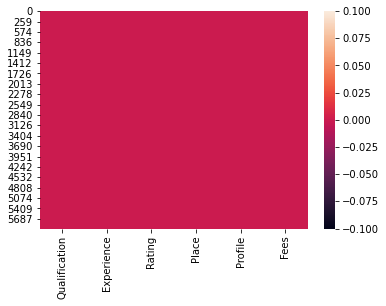

In [23]:
sn.heatmap(df.isnull())

In [24]:
df.isnull().sum()

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
Fees             0
dtype: int64

In [25]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100.0
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350.0
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250.0
7,BDS,10 years experience,99%,"Arekere, Bangalore",Dentist,200.0
12,"BDS, MDS",9 years experience,98%,"Coimbatore Racecourse, Coimbatore",Dentist,200.0


In [26]:
# need to correct qualifaication,experience,place,misc.info and rating, many string working need to be done
# to make experience as only integer 

df['Experience']=df['Experience'].str.replace('years experience','').astype(int)

In [27]:
# in qualification, need to correct regular expressions so importing re library
import re

In [28]:
def clean_text(text):
    text=str(text).lower()
    text=re.sub(r'[^a-z]','',text)
    text=re.sub(r'\s+','',text)
    return text

df['Qualification']=df['Qualification'].apply(clean_text)
    

In [29]:
# in place column too applying the same function and to treat missing values

def clean_place(text):
    text=str(text).lower()
    text=re.sub(r'[^a-z0-9]','',text)
    text=re.sub(r'\s+','',text)
    return text

df['Place']=df['Place'].apply(clean_place)

In [30]:
# in rating column removing %
def clean_rating(text):
    text=re.sub(r'%','',str(text))
    return text
df['Rating']=df['Rating'].apply(clean_rating)

In [31]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,bhmsmdhomeopathy,24,100,kakkanadernakulam,Homeopath,100.0
1,bamsmdayurvedamedicine,12,98,whitefieldbangalore,Ayurveda,350.0
4,bams,20,100,keelkattalaichennai,Ayurveda,250.0
7,bds,10,99,arekerebangalore,Dentist,200.0
12,bdsmds,9,98,coimbatoreracecoursecoimbatore,Dentist,200.0


In [32]:
# finding relationship between income and other features

<AxesSubplot:xlabel='count', ylabel='Qualification'>

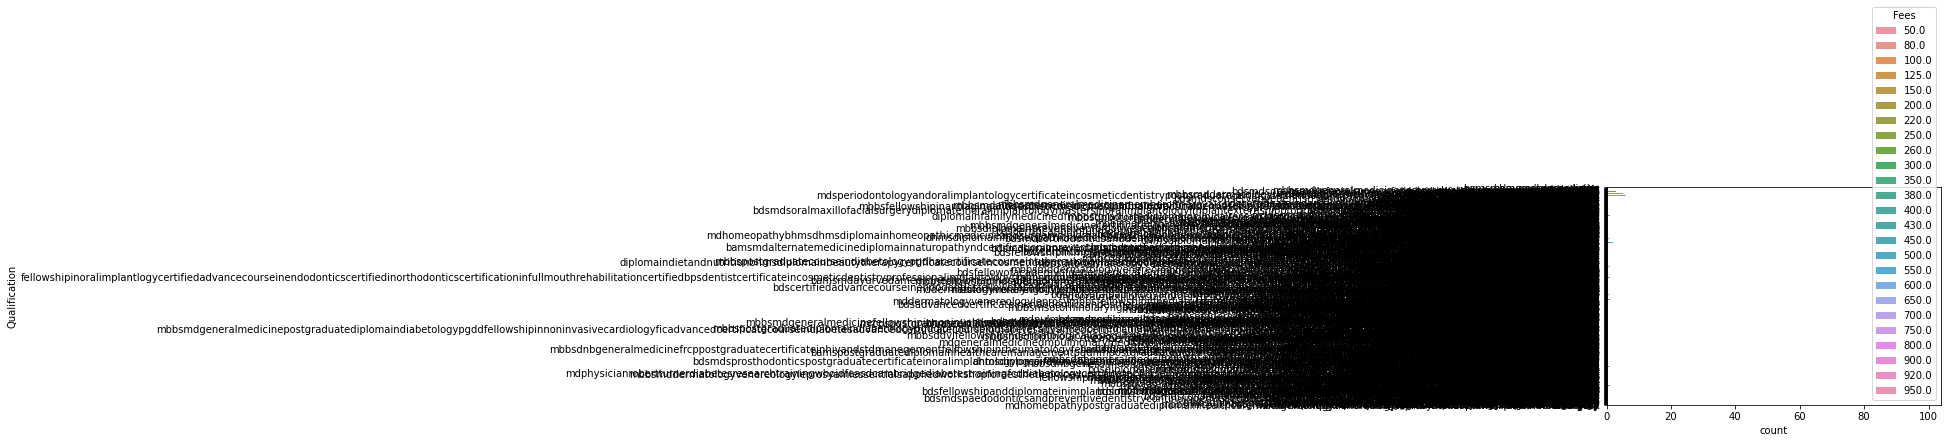

In [33]:
sn.countplot(y='Qualification',hue='Fees',data=df,)

<AxesSubplot:xlabel='count', ylabel='Experience'>

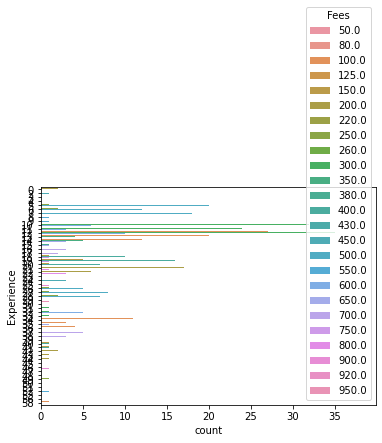

In [34]:
sn.countplot(y='Experience',hue='Fees',data=df,)

<AxesSubplot:xlabel='count', ylabel='Rating'>

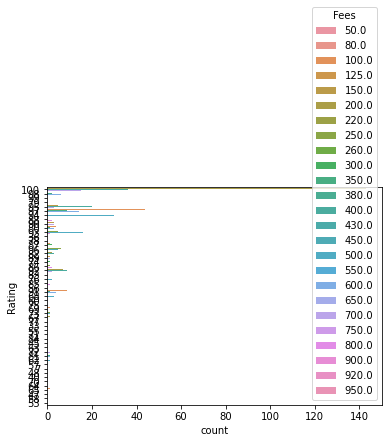

In [35]:
sn.countplot(y='Rating',hue='Fees',data=df,)

<AxesSubplot:xlabel='count', ylabel='Profile'>

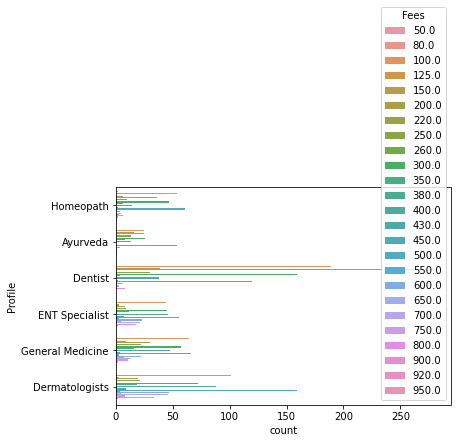

In [36]:
sn.countplot(y='Profile',hue='Fees',data=df,)

In [37]:
df['Qualification'].value_counts()

bds                                                                          248
mbbsmddermatology                                                            121
bhms                                                                         117
mbbsmsent                                                                    100
bams                                                                          83
                                                                            ... 
mdayurvedamedicine                                                             1
mdsprosthodonticsbdscertificateindentalimplants                                1
msentmbbsmsotorhinolaryngology                                                 1
mbbsdiplomainotorhinolaryngologydlodnbfellowshipinheadneckoncologysurgery      1
mdacupuncturephdayurvedabemsmbbs                                               1
Name: Qualification, Length: 862, dtype: int64

In [38]:
df['Experience'].value_counts()

9     173
12    163
10    148
11    141
19    140
14    135
13    131
15    114
8     105
7     103
18    102
17    100
16     96
21     87
20     78
22     75
6      70
5      65
23     65
24     47
28     40
25     39
27     36
29     29
26     27
33     26
38     26
37     24
34     24
31     23
32     23
30     21
4      18
35     17
40     16
36     14
3      14
39     12
0      12
46     11
41     11
44      8
2       8
43      8
45      8
42      6
47      5
48      3
50      3
49      3
51      2
53      1
52      1
58      1
56      1
Name: Experience, dtype: int64

In [39]:
df['Rating'].value_counts()

100    684
98     290
99     259
97     241
96     220
95     178
94     115
93     109
92      66
90      66
91      60
89      42
88      41
85      27
82      23
83      21
86      21
80      19
77      16
87      14
79      13
84      13
67      12
81      12
76       9
71       9
75       8
73       8
60       7
74       7
78       6
68       5
56       5
69       4
70       4
72       3
57       3
64       2
33       2
62       2
55       2
63       2
48       1
47       1
45       1
7        1
36       1
58       1
53       1
65       1
40       1
Name: Rating, dtype: int64

In [40]:
df['Profile'].value_counts()

Dentist             881
Dermatologists      638
General Medicine    390
ENT Specialist      304
Homeopath           260
Ayurveda            186
Name: Profile, dtype: int64

<AxesSubplot:xlabel='Profile', ylabel='count'>

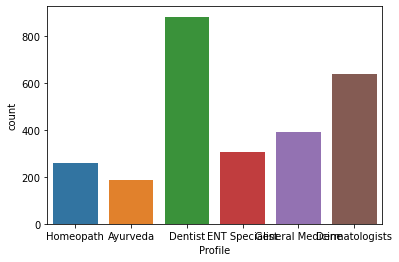

In [41]:
sn.countplot(df['Profile'])

In [42]:
# converting categorical values into numeric


from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

df['Qualification']=LE.fit_transform(df['Qualification'])
df['Place']=LE.fit_transform(df['Place'])
df['Profile']=LE.fit_transform(df['Profile'])


In [43]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,263,24,100,204,5,100.0
1,24,12,98,560,0,350.0
4,0,20,100,227,0,250.0
7,51,10,99,25,1,200.0
12,112,9,98,94,1,200.0


In [44]:
collist=df.columns.values
ncol=15
nrows=10

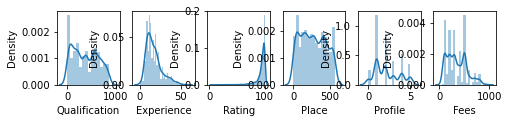

In [45]:
# snapshot of distribution curves of all input datas

plt.figure(figsize=(20,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sn.distplot(df[collist[i]])

Qualification       AxesSubplot(0.125,0.657941;0.133621x0.222059)
Experience       AxesSubplot(0.285345,0.657941;0.133621x0.222059)
Place             AxesSubplot(0.44569,0.657941;0.133621x0.222059)
Profile          AxesSubplot(0.606034,0.657941;0.133621x0.222059)
Fees             AxesSubplot(0.766379,0.657941;0.133621x0.222059)
dtype: object

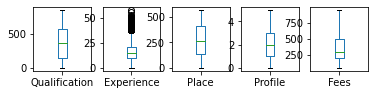

In [46]:
df.plot(kind='box',subplots=True,layout=(3,5))

In [47]:
df.describe()

,Qualification,Experience,Place,Profile,Fees
count,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000
mean,375.066942,17.067695,270.673561,2.229786,342.890184
std,253.061070,9.441073,166.095117,1.462936,192.858008
min,0.000000,0.000000,0.000000,0.000000,50.000000
25%,149.000000,10.000000,131.000000,1.000000,200.000000
50%,365.000000,15.000000,261.000000,2.000000,300.000000
75%,581.000000,21.000000,411.000000,3.000000,500.000000
max,861.000000,58.000000,567.000000,5.000000,950.000000


In [48]:
cor=df.corr()

In [49]:
cor

,Qualification,Experience,Place,Profile,Fees
Qualification,1.000000,0.120197,-0.008495,0.426416,0.252836
Experience,0.120197,1.000000,-0.004259,0.202379,0.059045
Place,-0.008495,-0.004259,1.000000,-0.003752,-0.046546
Profile,0.426416,0.202379,-0.003752,1.000000,0.156301
Fees,0.252836,0.059045,-0.046546,0.156301,1.000000


<AxesSubplot:>

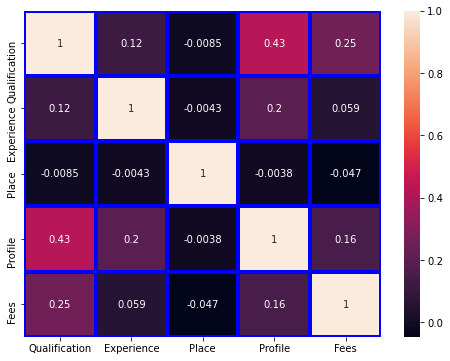

In [51]:
plt.figure(figsize=(8,6))
sn.heatmap(cor,annot=True,linewidth=3,linecolor='blue')

In [ ]:
# qualification and profile are more corelated with fees

In [55]:
df.skew()

Qualification    0.182249
Experience       1.120093
Rating          -3.277801
Place            0.122053
Profile          0.495594
Fees             0.562546
dtype: float64

In [56]:
# to standardise the data using standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaledx=scaler.fit_transform(df)

In [57]:
scaledx=df

In [58]:
df

,Qualification,Experience,Rating,Place,Profile,Fees
0,263,24,100,204,5,100.0
1,24,12,98,560,0,350.0
4,0,20,100,227,0,250.0
7,51,10,99,25,1,200.0
12,112,9,98,94,1,200.0
...,...,...,...,...,...,...
5953,774,35,92,297,5,100.0
5956,666,19,98,50,3,300.0
5958,361,41,97,147,4,600.0
5959,581,15,90,550,4,100.0


In [60]:
# Model Building

x=df.drop('Fees',axis=1)
y=df['Fees']

In [61]:
x

,Qualification,Experience,Rating,Place,Profile
0,263,24,100,204,5
1,24,12,98,560,0
4,0,20,100,227,0
7,51,10,99,25,1
12,112,9,98,94,1
...,...,...,...,...,...
5953,774,35,92,297,5
5956,666,19,98,50,3
5958,361,41,97,147,4
5959,581,15,90,550,4


In [62]:
y

0       100.0
1       350.0
4       250.0
7       200.0
12      200.0
        ...  
5953    100.0
5956    300.0
5958    600.0
5959    100.0
5960    200.0
Name: Fees, Length: 2659, dtype: float64

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=30)

In [64]:
lm=LinearRegression()

In [65]:
lm.fit(x_train,y_train)
LinearRegression()

LinearRegression()

In [66]:
lm.coef_

array([ 0.14292492, -0.15853429, -1.35810297, -0.06616508, 10.46909275])

In [67]:
lm.intercept_

417.70758716842624

In [68]:
lm.score(x_train,y_train)

0.0663195547725216

In [69]:
pred=lm.predict(x_test)
print("predicted Fees:",pred)
print("Fees",y_test)

predicted Fees: [300.38270496 285.67996832 285.8906762  402.22857254 293.06446615
 290.2876259  351.9617798  283.69129985 380.21247301 419.42973817
 275.09462995 290.04611233 384.71265895 378.05358397 361.31255496
 415.78463759 360.37162038 295.28611794 339.16612729 292.541469
 319.43006843 367.73303109 369.47698629 336.42379645 372.87495624
 274.11531583 352.67973044 330.50581459 376.86376436 408.3684954
 370.4986096  351.79073214 354.15516943 396.82927521 388.39433401
 320.46170556 278.97339676 414.85264118 295.5763858  289.67726141
 388.67149935 370.95234641 342.72701942 371.1562653  343.82209743
 386.88422012 394.11888955 329.01495797 411.28578331 280.457499
 292.59521667 372.15444979 421.2027381  367.36098363 336.1708051
 359.62724135 348.02186302 285.71322544 366.57641351 359.63730544
 293.29226356 366.25090085 296.54325451 356.93826434 376.77005349
 383.75736921 262.52932083 303.15990479 365.7065008  355.3367526
 265.8566817  349.00979532 391.33553726 387.93380414 358.12623374
 

In [70]:
print('error:')

print('mean absolute error:',mean_absolute_error(y_test,pred))
print('mean squared error:',mean_squared_error(y_test,pred))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error: 151.77018150476155
mean squared error: 33515.72424678773
root mean squared error: 183.07300250661683


In [71]:
from sklearn.metrics import r2_score

In [73]:
print(r2_score(y_test,pred))

0.08419486301447976


In [74]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lm.fit(x_train,y_train)
    pred_train=lm.predict(x_train)
    pred_test=lm.predict(x_test)
    print(f"At random state {i},the training accuracy is:-{r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:-{r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:-0.07203426933642942
At random state 0,the testing accuracy is:-0.0792569913591602


At random state 1,the training accuracy is:-0.0693637646500429
At random state 1,the testing accuracy is:-0.08406855771399868


At random state 2,the training accuracy is:-0.07392781193488673
At random state 2,the testing accuracy is:-0.07037950617831734


At random state 3,the training accuracy is:-0.07254843563902458
At random state 3,the testing accuracy is:-0.07486508815284543


At random state 4,the training accuracy is:-0.07242902313703492
At random state 4,the testing accuracy is:-0.07696720037002225


At random state 5,the training accuracy is:-0.0774156656765086
At random state 5,the testing accuracy is:-0.05025747855492502


At random state 6,the training accuracy is:-0.07663888127102447
At random state 6,the testing accuracy is:-0.05704964065399987


At random state 7,the training accuracy is:-0.07042840524389038
At random state 7,the testing accura

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=59)

In [76]:
lm.fit(x_train,y_train)

LinearRegression()

In [77]:
pred_test=lm.predict(x_test)

In [78]:
print(r2_score(y_test,pred_test))

0.10066161812042318


In [79]:
# R2 score for the model is 100%, let's build on more algorithms

In [80]:
from sklearn.linear_model import Lasso,Ridge

In [81]:
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.06658067149954872

In [82]:
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.06658067151680647

In [83]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.066580671514896


array([ 0.15955574, -0.08729263, -1.58851227, -0.04521637,  5.92564574])

In [84]:
from sklearn.svm import SVR
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)

In [85]:
svr=SVR(kernel='poly')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)

In [86]:
svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)

In [87]:
from sklearn.svm import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.03638916789182289
0.014876068637882045
0.08425835931260117


In [88]:
#Regularization

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [89]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [90]:
ls=Lasso(alpha=10,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.09600738010465948

In [91]:
from sklearn.linear_model import Ridge
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
rd=Ridge()
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [92]:
rd=Ridge(alpha=10,random_state=0)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_rd=rd.predict(x_test)
rdd=r2_score(y_test,pred_rd)
rdd

0.10065460759881772

In [93]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.06635362643977358

In [94]:
cv_score=cross_val_score(rd,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.06698207458479093

In [95]:
#Conclusion-from analysis of accuracy scores and cross validation score it is decided that Ridge is right model

In [97]:
# Saving the model

import joblib
joblib.dump(rdd,"consultationfeeprediction.pkl")

['consultationfeeprediction.pkl']